# Packages/Modules


In [1]:
!python --version

Python 3.9.5


In [2]:
!pip --version

pip 24.0 from E:\Python Projects\GaussParse\venv\lib\site-packages\pip (python 3.9)



In [3]:
# import packages/modules
import numpy as np
import matplotlib.pyplot as plt
# from scipy.interpolate import splrep, splev, UnivariateSpline
from matplotlib import ticker
import pandas as pd
# from google.colab import files
import os
import re
# import packages
# from google.colab import drive

# Util


In [11]:
def CheckFileFormat(file_path):
    '''
    check file format

    args:
        filePath: file name dir

    return:
        file directory, file name, file format
    '''
    # check file exist
    if os.path.isfile(file_path):
        # file analysis
        fileDir = os.path.dirname(file_path)
        fileNameWithExtension = os.path.basename(file_path)
        fileName, fileExtension = os.path.splitext(fileNameWithExtension)

        # res
        return fileDir, fileName, fileExtension
    else:
        raise Exception('file path is not valid.')

# Read excel


excel file


In [14]:
# source
source_path = 'D:\\Google Cloud\\Python Source\\Gaussian\\energy.xlsx'
# excel file and path
file_dir, excel_file, file_extension = CheckFileFormat(source_path)
print(f"excel file: {excel_file}")
print(f"file extension: {file_extension}")

# destination
destination_path = file_dir

excel file: energy
file extension: .xlsx


dataframe


In [16]:
df = pd.read_excel(source_path)
df

,LABEL,X,Y,GROUP,LEGEND,COLOR,LABEL_POSITION,LABEL_DISPLAY,Y_POSITION,Y_DISPLAY
0,R1,1,0.000000,1,trans-LO,blue,top,NaN,top,NaN
1,RC1,2,6.802133,1,NaN,NaN,NaN,NaN,NaN,NaN
2,TS1,3,28.331760,1,NaN,NaN,NaN,NaN,NaN,NaN
3,PC1,4,-57.014923,1,NaN,NaN,NaN,NaN,NaN,NaN
4,P1,5,-64.086881,1,NaN,NaN,NaN,NaN,NaN,NaN
5,R1-1,7,0.000000,2,trans-LDO (2O same side),red,top,NaN,top,NaN
6,RC1-1,8,7.749662,2,NaN,NaN,NaN,NaN,NaN,NaN
7,TS1-1,9,30.891973,2,NaN,NaN,NaN,NaN,NaN,NaN
8,PC1-1,10,-55.006913,2,NaN,NaN,NaN,NaN,NaN,NaN
9,P1-1,11,-62.505574,2,NaN,NaN,NaN,NaN,NaN,NaN


# Load excel file


In [17]:
def setY(Y):
    '''
    duplicate Y data

    args:
        Y {list[float]}: data list

    return:
        Y2 {list[float]}: duplicated Y list
    '''
    Y2 = [item for item in Y for _ in range(2)]
    return Y2

In [24]:
_Y = setY(df['Y'])
print(_Y)

[0.0, 0.0, 6.80213252, 6.80213252, 28.33176045, 28.33176045, -57.01492258, -57.01492258, -64.08688139, -64.08688139, 0.0, 0.0, 7.74966205, 7.74966205, 30.89197269, 30.89197269, -55.00691298, -55.00691298, -62.50557383, -62.50557383, 0.0, 0.0, 6.55740635, 6.55740635, 30.13896909, 30.13896909, -55.9105173, -55.9105173, -63.13307683, -63.13307683]


In [19]:
def resetY(Y):
    '''
    reset to initial Y data list

    args:
        Y {list[float]}: duplcated data list

    return:
        Y2 {list[float]}: initial Y list
    '''
    Y2 = Y[0::2]
    return Y2

In [23]:
_Y2 = resetY(_Y)
print(_Y2)

[0.0, 6.80213252, 28.33176045, -57.01492258, -64.08688139, 0.0, 7.74966205, 30.89197269, -55.00691298, -62.50557383, 0.0, 6.55740635, 30.13896909, -55.9105173, -63.13307683]


step 1: multiply 10 to each X

step 2: add 1 to each X and then save to the list

example:

X = [1,2,3,4,5]

X2 = [10,20,30,40,50]

X3 = [10,11,20,21,30,31,40,41,50,51]


In [21]:
def setX(X, span=10, line=3):
    '''
    change the inital X list as:
        step 1: wider dataset
        step 2: make a platform for each state

    args:
        X {list[int]}: data list
        span {int}: data width
        line {int}: label width

    return:
        X3 {list[int]}: new X data
    '''
    # Step 1: Multiply each element by 10
    X2 = [item * int(span) for item in X]

    # Step 2: For each element in X2, add 1 and then store both original and incremented values
    X3 = []
    for item in X2:
        X3.append(item)
        X3.append(item + int(line))

    return X3

In [22]:
_X = setX(df['X'])
print(_X)

[10, 13, 20, 23, 30, 33, 40, 43, 50, 53, 70, 73, 80, 83, 90, 93, 100, 103, 110, 113, 130, 133, 140, 143, 150, 153, 160, 163, 170, 173]


In [25]:
def resetX(X, span=10, line=3):
    '''
    change the inital X list as:
        step 1: wider dataset
        step 2: make a platform for each state

    args:
        X {list[int]}: data list
        span {int}: data width
        line {int}: label width

    return:
        X3 {list[int]}: the initial X data
    '''
    # Step 1: divide each element by 10
    X2 = [item for item in X]
    # step 2: choose even elements
    X3 = X2[0::2]

    return X3

In [26]:
_X2 = resetX(_X)
print(_X2)

[10, 20, 30, 40, 50, 70, 80, 90, 100, 110, 130, 140, 150, 160, 170]


excel loader


In [28]:
# make a df list
def excelLoader(excel_file):
    '''
    load an excel file containing data as:
      column 1: ID
      column 2: X - coordinate reaction point
      column 3: Y - energy data
      column 4: GROUP - indicate data series
      column 5: LEGEND - legend for each data series
      column 6: COLOR - data series color
      column 7: LABEL_POSITION - label position
      column 8: LABEL_DISPLAY - display data
      column 9: Y_POSITION - label position
      column 10: Y_DISPLAY - display data

    args:
      excel_file {str}: excel file directory

    return:
      data for plotting
    '''
    try:
        # check
        if os.path.exists(excel_file) and os.path.isfile(excel_file):
            # make a dataframe
            df = pd.read_excel(excel_file)
            # get all group values
            groups = list(set(df['GROUP'].tolist()))
            # df list
            dfs = []
            for i in groups:
                _df = df[df['GROUP'] == i]
                dfs.append(_df)
                # rest
                _df = _df.drop(_df.index)

            data = []
            for item in dfs:
                # label
                _LABEL = item['LABEL'].tolist()
                # X
                _X = item['X'].tolist()
                _X2 = setX(_X)
                # Y
                _Y = item['Y'].tolist()
                _Y2 = setY(_Y)
                # group
                _GROUP = list(set(item['GROUP'].tolist()))
                # legend
                _iLegend = item.dropna(subset=['LEGEND'])
                # check
                if _iLegend.shape[0] == 1:
                    _LEGEND = _iLegend['LEGEND'].tolist()
                else:
                    print("err")
                # color
                _iColor = item.dropna(subset=['COLOR'])
                # check
                if _iColor.shape[0] == 1:
                    _COLOR = _iColor['COLOR'].tolist()
                else:
                    print("err")
                # label position
                _iLabelPosition = item.dropna(subset=['LABEL_POSITION'])
                if _iLabelPosition.shape[0] == 1:
                    _LABEL_POSITION = _iLabelPosition['LABEL_POSITION'].tolist(
                    )
                else:
                    # default
                    _LABEL_POSITION = ['top']
                # label display
                _LABEL_DISPLAY = item['LABEL_DISPLAY'].fillna("Yes").tolist()
                # Y position
                _iYPosition = item.dropna(subset=['Y_POSITION'])
                if _iYPosition.shape[0] == 1:
                    _Y_POSITION = _iYPosition['Y_POSITION'].tolist()
                else:
                    # default
                    _Y_POSITION = ['top']
                # Y display
                _Y_DISPLAY = item['Y_DISPLAY'].fillna("Yes").tolist()
                # set data
                _data = {
                    "LABEL": _LABEL,
                    "X": _X2,
                    "Y": _Y2,
                    "GROUP": _GROUP,
                    "LEGEND": _LEGEND,
                    "COLOR": _COLOR,
                    "LABEL_POSITION": _LABEL_POSITION,
                    "LABEL_DISPLAY": _LABEL_DISPLAY,
                    "Y_POSITION": _Y_POSITION,
                    "Y_DISPLAY": _Y_DISPLAY,
                }
                # save
                data.append(_data)
                # reset
                _data = {}

        # res
        return data
    except Exception as e:
        print(e)

In [30]:
dfs = excelLoader(source_path)
dfs

[{'LABEL': ['R1', 'RC1', 'TS1', 'PC1', 'P1'],
  'X': [10, 13, 20, 23, 30, 33, 40, 43, 50, 53],
  'Y': [0.0,
   0.0,
   6.80213252,
   6.80213252,
   28.33176045,
   28.33176045,
   -57.01492258,
   -57.01492258,
   -64.08688139,
   -64.08688139],
  'GROUP': [1],
  'LEGEND': ['trans-LO'],
  'COLOR': ['blue'],
  'LABEL_POSITION': ['top'],
  'LABEL_DISPLAY': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
  'Y_POSITION': ['top'],
  'Y_DISPLAY': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes']},
 {'LABEL': ['R1-1', 'RC1-1', 'TS1-1', 'PC1-1', 'P1-1'],
  'X': [70, 73, 80, 83, 90, 93, 100, 103, 110, 113],
  'Y': [0.0,
   0.0,
   7.74966205,
   7.74966205,
   30.89197269,
   30.89197269,
   -55.00691298,
   -55.00691298,
   -62.50557383,
   -62.50557383],
  'GROUP': [2],
  'LEGEND': ['trans-LDO (2O same side)'],
  'COLOR': ['red'],
  'LABEL_POSITION': ['top'],
  'LABEL_DISPLAY': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
  'Y_POSITION': ['top'],
  'Y_DISPLAY': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes']},
 {'LABEL': ['R1-2', 'RC1-

# Plot multiple data series


In [31]:
def setPosition(position, Xs, Ys, margin=2.5):
    '''
    config text positio to show label

    args:
        position {str}: label position (top/bottom)
        Xs {list[number]}: X values
        Ys {list[number]}: Y values
        margin {number}: move text vertically (default value: 2.5)

    return:
        x_mid, y_mid {list[number]}: new position
    '''
    # set
    x_mid = 0.5 * (Xs[0] + Xs[1])
    y_mid = 0.5 * (Ys[0] + Ys[1])
    margin = 2.5  # Adjust this value as needed for margin
    # check
    if position == 'top':
        y_mid += margin
    elif position == 'bottom':
        y_mid -= margin
    # res
    return x_mid, y_mid

In [37]:
def mPlot(data, plot_type="linear", save_img=False, img_name="plot", target_dir="", plot_sub={}, y_label="Gibbs free energy (kcal/mol)",
          x_label="Reaction coordinate", plot_title="", xlim=[10, 10], ylim=[5, 5], label_margin=4, figsize=[10, 6], y_major_locator=5):
    '''
    plot data series

    args:
        data: list of dict
        X {list}: X values
        Y {list}: Y values
        LABEL {list}: labels
        LEGEND {list}: legend
        GROUP {list}: group id
        COLOR {list}: data series color
        LABEL_POSITION {list}: set label position on each line (default: top)
        LABEL_DISPLAY {list}: set label display (Yes/No)
        Y_POSITION {list}: set label position on each line (default: top)
        Y_DISPLAY {list}: set label display (Yes/No)
        plot_type {str}: plot type, linear or gaussian
        save_img {bool}: set to save plot (default: False)
        img_name {str}: plot name (file name)
        target_dir {str}: plot img to target dir
        plot_sub {dict}: subplot details
        row {number}: plot row
        col {number}: plot column
        y_label {str}: y label text
        x_label {str}: x label text
        plot_title {str}: plot title
        xlim {list[number]}: x-axis range
        ylim {list[number]}: y-axis range
        figsize {list[number]}: fig size (default: [10,6])
        y_major_locator {number}: set y-axis major locator
    '''
    # create a plot
    fig, ax = plt.subplots(figsize=figsize)

    # check subplot
    if len(plot_sub) > 0:
        print("set subplot")

    # Add a title to the plot
    if len(plot_title) > 0:
        plt.title(str(plot_title), fontweight='bold',
                  color='black', fontsize=16)

    # Set the y-label
    ax.set_ylabel(y_label, fontweight='bold', color='black')
    # set the x-label
    ax.set_xlabel(x_label, fontweight='bold', color='black')

    # Set the label position
    # The x coordinate is typically negative for the y-axis label to be placed outside the plot
    # ax.yaxis.set_label_coords(-0.1, 0.5)
    # ax.xaxis.set_label_coords(0.5, -0.05)

    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)

    # Remove the x-axis tick labels
    ax.set_xticklabels([])
    # Hide the x-axis tick symbols
    ax.tick_params(axis='x', which='both', bottom=False,
                   top=False, labelbottom=True)
    # Hide the x-axis
    ax.xaxis.set_visible(True)

    # Set the y-tick labels to display the actual values
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(y_major_locator))

    # grid
    # plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5, alpha=0.25)
    # Enable minor ticks
    plt.minorticks_on()
    # Customize major grid lines
    plt.grid(which='major', color='grey',
             linestyle='-', linewidth=0.5, alpha=0.25)
    # Customize minor grid lines
    plt.grid(which='minor', color='gray',
             linestyle=':', linewidth=0.4, alpha=0.25)

    # Y min/max
    minY = []
    maxY = []
    # X min/max
    minX = []
    maxX = []

    # plot data series
    for item in data:
        # extract
        X = item['X']
        Y = item['Y']
        labels = item['LABEL']
        legend = str(item['LEGEND'][0])
        color = str(item['COLOR'][0])
        label_position = str(item['LABEL_POSITION'][0])
        label_display = item['LABEL_DISPLAY']
        Y_position = str(item['Y_POSITION'][0])
        Y_display = item['Y_DISPLAY']

        # min
        _minY = min(Y)
        _minX = min(X)
        minY.append(_minY)
        minX.append(_minX)
        # max
        _maxY = max(Y)
        _maxX = max(X)
        maxY.append(_maxY)
        maxX.append(_maxX)

        # plot
        if plot_type == 'linear':
            ax.plot(X, Y, linestyle="dotted",
                    label=legend, color=color, linewidth=1)
        else:
            # gaussian
            _X = resetX(X)
            _Y = resetY(Y)
            # Create a spline representation
            # spline = UnivariateSpline(_X, _Y, s=0)  # Adjust smoothing factor as needed
            # Generate new data points for a smoother curve
            # _Ynew = spline(_X)
            # plot
            # ax.plot(resetX(X), resetY(Y),"--",label=legend,color=color,linewidth=1)
            # ax.plot(_X,_Ynew,label=legend,color=color,linewidth=1)

        # plot lines
        Xsize = len(X)
        # set labels
        k = 0
        for i in range(0, len(X), 2):
            # set
            # label position
            x_mid, y_mid = setPosition(
                label_position, (X[i], X[i+1]), (Y[i], Y[i+1]), margin=label_margin)
            # Y position
            x_mid_Y, y_mid_Y = setPosition(
                Y_position, (X[i], X[i+1]), (Y[i], Y[i+1]), margin=label_margin)

            # point position
            # ax.scatter(x_mid, y_mid, color='blue', marker='o')
            # ax.scatter(x_mid_Y, y_mid_Y, color='red', marker='o')

            # plot data
            if plot_type == 'linear':
                ax.plot((X[i], X[i+1]), (Y[i], Y[i+1]),
                        "-", color="black", linewidth=3)
            else:
                # ax.plot((X[i]-0.5,X[i]+0.5),(Y[i],Y[i]),"-",color="black",linewidth=2)
                ax.scatter(X[i], Y[i], color='black', marker='o')

            # set
            _Yi_accuracy = "("+str("{:.2f}".format(Y[i]))+")"

            # set labels
            _labels = ''
            # check if the same line
            # check label/Y display
            if label_display[k] == 'Yes' and Y_display[k] == 'Yes':
                if str(label_position) == str(Y_position):
                    _labels = labels[k]
                    _labels += _Yi_accuracy if len(
                        _labels) == 0 else " "+_Yi_accuracy
                    # set
                    ax.text(x_mid, y_mid, _labels, ha='center',
                            va='center_baseline', fontsize=10)
                else:
                    ax.text(
                        x_mid, y_mid, labels[k], ha='center', va='center_baseline', fontsize=10)
                    ax.text(x_mid_Y, y_mid_Y, _Yi_accuracy, ha='center',
                            va='center_baseline', fontsize=10)
            else:
                # check label display
                if label_display[k] == 'Yes':
                    # set
                    ax.text(
                        x_mid, y_mid, labels[k], ha='center', va='center_baseline', fontsize=10)
                # check Y display
                if Y_display[k] == 'Yes':
                    # set
                    ax.text(x_mid_Y, y_mid_Y, _Yi_accuracy, ha='center',
                            va='center_baseline', fontsize=10)
            # set
            k += 1

    # Set the y-axis range
    ax.set_ylim(min(minY)-ylim[0], max(maxY)+ylim[1])
    ax.set_xlim(min(minX)-xlim[0], max(maxX)+xlim[1])

    # Adding a customized legend
    # ax.legend(loc='upper right', fontsize='medium', title='', shadow=True)
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    # Adjust x, y for position
    ax.legend(loc='upper left', bbox_to_anchor=(0, 0))

    # theme
    plt.style.use('bmh')

    # plot file name
    img_name = img_name + ".png"
    # check
    if save_img:
        # save a figure
        if len(target_dir) == 0:
            _cwd = os.getcwd()
            img_path = os.path.join(_cwd, img_name)
        else:
            img_path = os.path.join(target_dir, img_name)
        # Apply tight layout for automatic spacing
        plt.tight_layout()
        # Save using the format parameter
        plt.savefig(img_path, facecolor='white', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

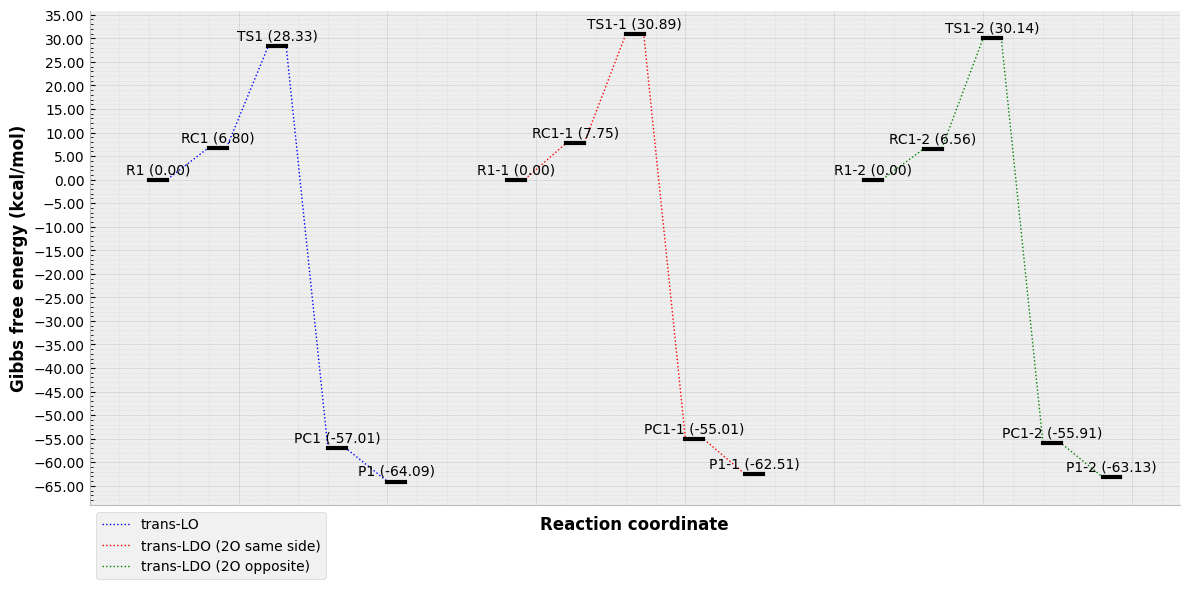

In [39]:
# subplot setting
mPlot(dfs, save_img=False, figsize=[12, 6], target_dir=destination_path)